In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("media\heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# No tenemos datos nulos, no debemos eliminar ninguno

In [9]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [10]:
# Tenemos una población de personas entre 28 y 77 años
# Hay valores 0 en RestingBP , Cholesterol y negativo en Oldpeak

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
columns = list(df.columns)
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

**Age** : La edad del paciente [years]

**Sex**: El sexo del paciente  [M: Male, F: Female]

**ChestPainType**: Tipo de dolor de pecho [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: presión arterial en reposo:
   - Tension Baja - 90/60mmHg tenemos la tensión baja [mm Hg]
   - Hipertenso - por encima de los 140/90 mmHg somos hipertensos
   - Tension Normal - 120 mmHg para la sistólica y 80 mmHg
   - Tension normal alta - Entre 120/80 mmHg y los 139/89mmHg,

**Cholesterol**: Colesterol serico. Es el colesterol total e incluye ambos tipos: El colesterol de lipoproteína de baja densidad (LDL, por su sigla en inglés) y el colesterol de lipoproteína de alta densidad (HDL, por su sigla en inglés) o Colesterol malo (LDL) Se mide en [mm/dl]

Para personas de 20 años o mayores un nivel saludable es 125 a 200 mg/dL


**FastingBS**: Nivel de azucar en ayunas (fasting blood sugar) [1: if FastingBS > 120 mg/dl, 0: otherwise]
   - Los valores de azúcar en la sangre en ayunas de 99 mg/dl o menores son normales, 
   - los de 100 a 125 mg/dl indican que tiene prediabetes 
   - los de 126 mg/dl o mayores indican que tiene diabetes.

**RestingECG**: Resultados electrocardiográficos en reposo (resting electrocardiogram results):
   - Normal: Normal
   - ST:  Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV))
          (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) )
   - LVH: Muestra hipertropía ventricular izquierda probable o definitiva según los criterios de Estes.
          (showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR**: frecuencia cardíaca máxima alcanzada (maximum heart rate achieved) [Numeric value between 60 and 202]
   - Una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. La maxima frecuencia se puede obtener FC max = 206 – 0.88 x edad. 

**ExerciseAngina**: Angina inducida por ejercicio (exercise-induced angina) [Y: Yes, N: No]

**Oldpeak**: Depresión del ST inducida por el ejercicio en relación con el descanso (oldpeak) = ST [Numeric value measured in depression]

**ST_Slope**: La pendiente del segmento ST de ejercicio pico (categórica con 3 niveles) - (the slope of the peak exercise ST segment)
   - Up: upsloping - ascenso
   - Flat: flat - plano
   - Down: downsloping - descenso

**HeartDisease**: Enfermedad del corazón (output class) [1: heart disease, 0: Normal]

In [13]:
df['Age'].sort_values().unique()

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

In [14]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [17]:
df.groupby(['Sex'])['HeartDisease'].count()

Sex
F    193
M    725
Name: HeartDisease, dtype: int64

In [18]:
# Transformemos los datos catergoricos de ChestPainType, RestingECG, ST_Slope

In [19]:
data = df.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
encoder = LabelEncoder()

In [22]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [23]:
data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [24]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [25]:
data["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [26]:
data[['ChestPainType', 'RestingECG', 'ST_Slope']] = data[['ChestPainType', 'RestingECG', 'ST_Slope']].apply(encoder.fit_transform)
data

Age Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40   M              1        140          289          0           1   
1     49   F              2        160          180          0           1   
2     37   M              1        130          283          0           2   
3     48   F              0        138          214          0           1   
4     54   M              2        150          195          0           1   
..   ...  ..            ...        ...          ...        ...         ...   
913   45   M              3        110          264          0           1   
914   68   M              0        144          193          1           1   
915   57   M              0        130          131          0           1   
916   57   F              1        130          236          0           0   
917   38   M              2        138          175          0           1   

     MaxHR ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172              N      0.0         2             0  
1      156              N      1.0         1             1  
2       98              N      0.0         2             0  
3      108              Y      1.5         1             1  
4      122              N      0.0         2             0  
..     ...            ...      ...       ...           ...  
913    132              N      1.2         1             1  
914    141              N      3.4         1             1  
915    115              Y      1.2         1             1  
916    174              N      0.0         1             1  
917    173              N      0.0         2             0  

[918 rows x 12 columns]

In [27]:
data["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

         -Valor 1 es Normal    552
         -Valor 0 es LVH       188
         -Valor 2 es ST        178

In [28]:
data["ChestPainType"].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

     -Valor 0 es ASY    496
     -Valor 1 es NAP    203
     -Valor 2 es ATA    173
     -Valor 3 es TA     46

In [29]:
data["ST_Slope"].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

     - Valor 1 es Flat    460
     - Valor 2 es Up      395
     - Valor 0 es Down     63


In [30]:
data = pd.get_dummies(data, columns = ['Sex', 'ExerciseAngina'])
data

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40              1        140          289          0           1    172   
1     49              2        160          180          0           1    156   
2     37              1        130          283          0           2     98   
3     48              0        138          214          0           1    108   
4     54              2        150          195          0           1    122   
..   ...            ...        ...          ...        ...         ...    ...   
913   45              3        110          264          0           1    132   
914   68              0        144          193          1           1    141   
915   57              0        130          131          0           1    115   
916   57              1        130          236          0           0    174   
917   38              2        138          175          0           1    173   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  \
0        0.0         2             0      0      1                 1   
1        1.0         1             1      1      0                 1   
2        0.0         2             0      0      1                 1   
3        1.5         1             1      1      0                 0   
4        0.0         2             0      0      1                 1   
..       ...       ...           ...    ...    ...               ...   
913      1.2         1             1      0      1                 1   
914      3.4         1             1      0      1                 1   
915      1.2         1             1      0      1                 0   
916      0.0         1             1      1      0                 1   
917      0.0         2             0      0      1                 1   

     ExerciseAngina_Y  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
913                 0  
914                 0  
915                 1  
916                 0  
917                 0  

[918 rows x 14 columns]

**Pasamos a visualizar graficamente la informacion**

Vamos a comprobar si hay alguna diferencia de los valores bbiarios para el resto de los campos, es decir 
   - Sex (cogeremos la primera Sex_F)
   - FastingBS
   - ExerciseAngina_N
   
Luego haremos la misma comprobación con la información de las variables categóricas transformadas en numericas:
   - ChestPainType
   - RestingECG
   - ST_Slope

Las variables con valores multiples son:
   - Age
   - RestingBP
   - Cholesterol
   - MaxHR
   - Oldpeak
    

In [40]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [41]:
columns = list(data.columns)
columns

['Age',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y']

In [42]:
#Vemos donde se encuentras los valores de las variables multiples ( Age, RestingBP, Cholesterol, MaxHR, )

In [43]:
data[(data.RestingBP==0)]

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
449   55              2          0            0          0           1    155   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  \
449      1.5         1             1      0      1                 1   

     ExerciseAngina_Y  
449                 0

In [44]:
data[(data.Oldpeak<0)]

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
321   63              0        100            0          1           1    109   
324   46              0        100            0          1           2    133   
325   42              0        105            0          1           1    128   
326   45              2        110            0          0           1    138   
331   56              0        115            0          1           2     82   
332   38              2        100            0          0           1    179   
334   51              0        130            0          1           1    170   
335   62              3        120            0          1           0    134   
352   56              0        120            0          0           2    100   
407   62              0        115            0          1           1     72   
413   56              2        125            0          1           1     98   
421   66              2        120            0          0           2    120   
512   35              2        123          161          0           2    153   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  ExerciseAngina_N  \
321     -0.9         1             1      0      1                 1   
324     -2.6         1             1      0      1                 1   
325     -1.5         0             1      0      1                 0   
326     -0.1         2             0      0      1                 1   
331     -1.0         2             1      0      1                 1   
332     -1.1         2             0      0      1                 1   
334     -0.7         2             1      0      1                 1   
335     -0.8         1             1      0      1                 1   
352     -1.0         0             1      0      1                 0   
407     -0.5         1             1      0      1                 0   
413     -2.0         1             1      0      1                 1   
421     -0.5         2             0      0      1                 1   
512     -0.1         2             0      0      1                 1   

     ExerciseAngina_Y  
321                 0  
324                 0  
325                 1  
326                 0  
331                 0  
332                 0  
334                 0  
335                 0  
352                 1  
407                 1  
413                 0  
421                 0  
512                 0

In [45]:
# Hay valores 0 en RestingBP , Cholesterol y FastingBS y negativo en Oldpeak

In [46]:
data[(data.Cholesterol==0)].Cholesterol.value_counts()

0    172
Name: Cholesterol, dtype: int64

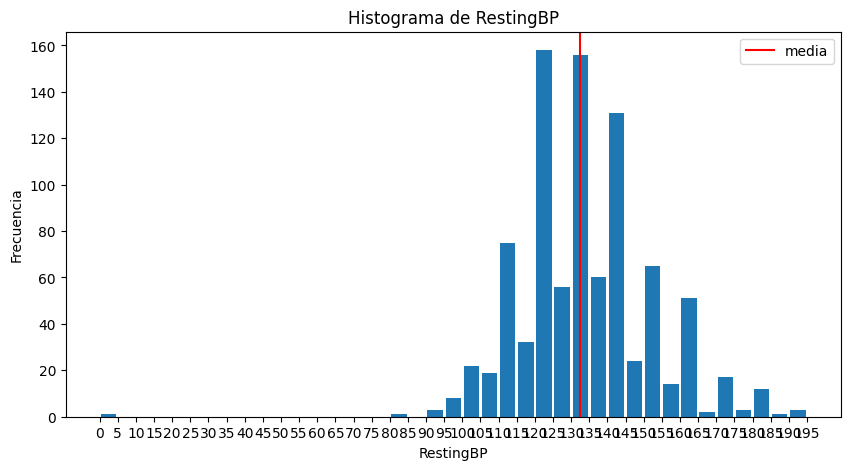

In [50]:
plt.figure(figsize=(10,5))
intervalos = list(range(0, 200, 5)) #calculamos los extremos de los intervalos
plt.hist(x=data.RestingBP, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = data.RestingBP.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

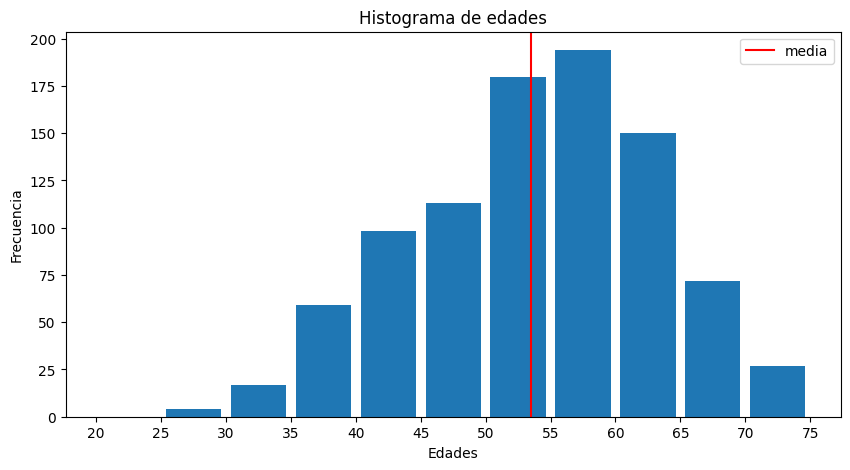

In [51]:
plt.figure(figsize=(10,5))
intervalos = list(range(20, 80, 5)) #calculamos los extremos de los intervalos
plt.hist(x=data.Age, bins=intervalos, rwidth=0.85, histtype="bar" )
plt.axvline(x = data.Age.mean(), color = 'red', label = 'media') 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('Histograma de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

In [52]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [53]:
fig = px.histogram(data, x="Age", marginal="box")
fig.update_layout(title='Distribution of Age')
fig.show()

In [54]:
fig = px.histogram(data, x="Age", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [55]:
fig = px.pie(data, names='Sex_F')
fig.update_layout(title='% of Sex_F')
fig.show()

In [56]:
fig = px.histogram(data, x="Sex_F",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [57]:
fig = px.pie(data, names='HeartDisease')
fig.update_layout(title='% of Heart Disease')
fig.show()

In [58]:
fig = px.pie(data, names='FastingBS')
fig.update_layout(title='% of FastingBS')
fig.show()

In [59]:
fig = px.histogram(data, x="FastingBS",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [60]:
fig = px.pie(data, names='ExerciseAngina_N')
fig.update_layout(title='% of ExerciseAngina_N')
fig.show()

In [61]:
fig = px.histogram(data, x="ExerciseAngina_N",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [62]:
fig = px.pie(data, names='ChestPainType', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ChestPain Type')
fig.show()

In [63]:
fig = px.histogram(data, x="ChestPainType",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [64]:
fig = px.pie(data, names='RestingECG', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of RestingECG')
fig.show()

In [65]:
fig = px.histogram(data, x="RestingECG",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [66]:
fig = px.pie(data, names='ST_Slope', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of ST_Slope')
fig.show()

In [67]:
fig = px.histogram(data, x="ST_Slope",
                   color='HeartDisease', 
                   barmode='group', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

In [87]:
#Vemos como se comportan las variables de valores multiples ( Age, RestingBP, Cholesterol, MaxHR, ) con los valores
# binarios: HeartDisease,  Sex_M, FastingBS, ExerciseAngina_N

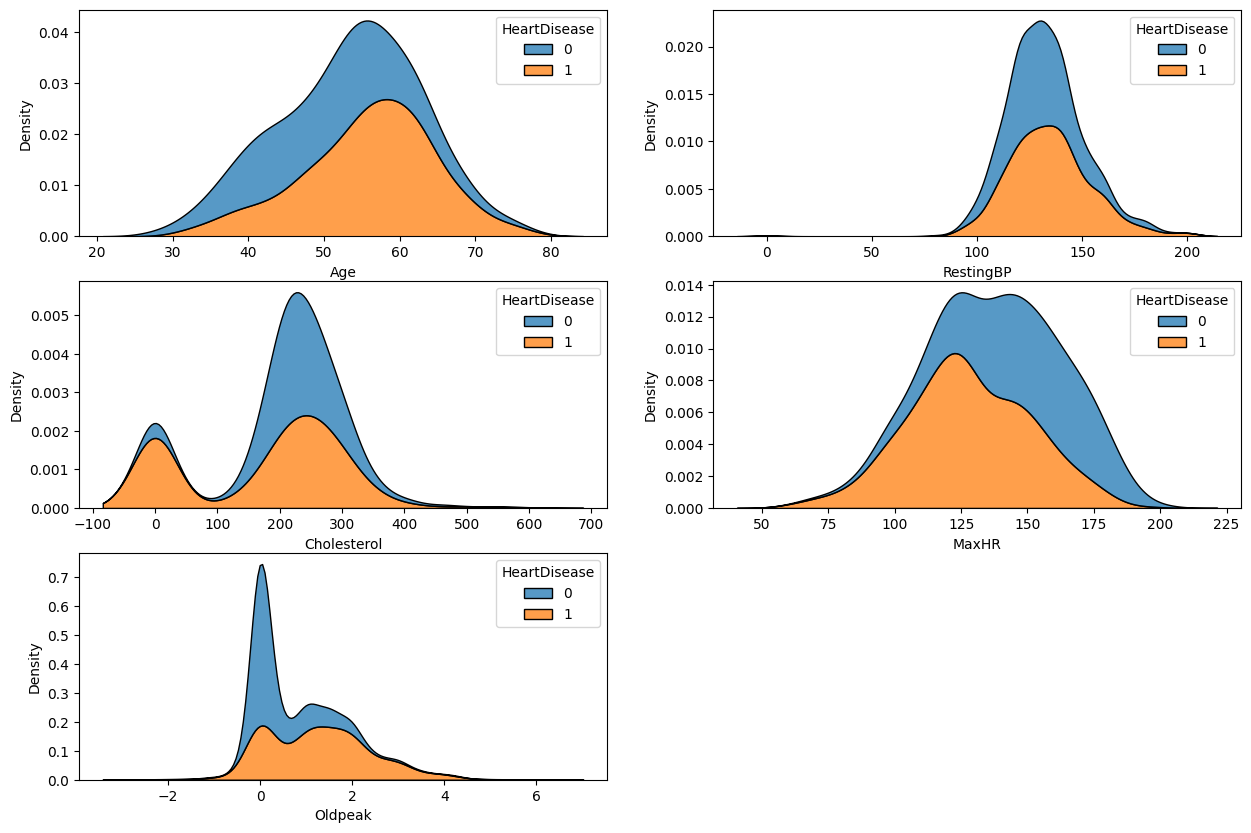

In [271]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="HeartDisease", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="HeartDisease", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="HeartDisease", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="HeartDisease", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="HeartDisease", multiple="stack")

plt.show()

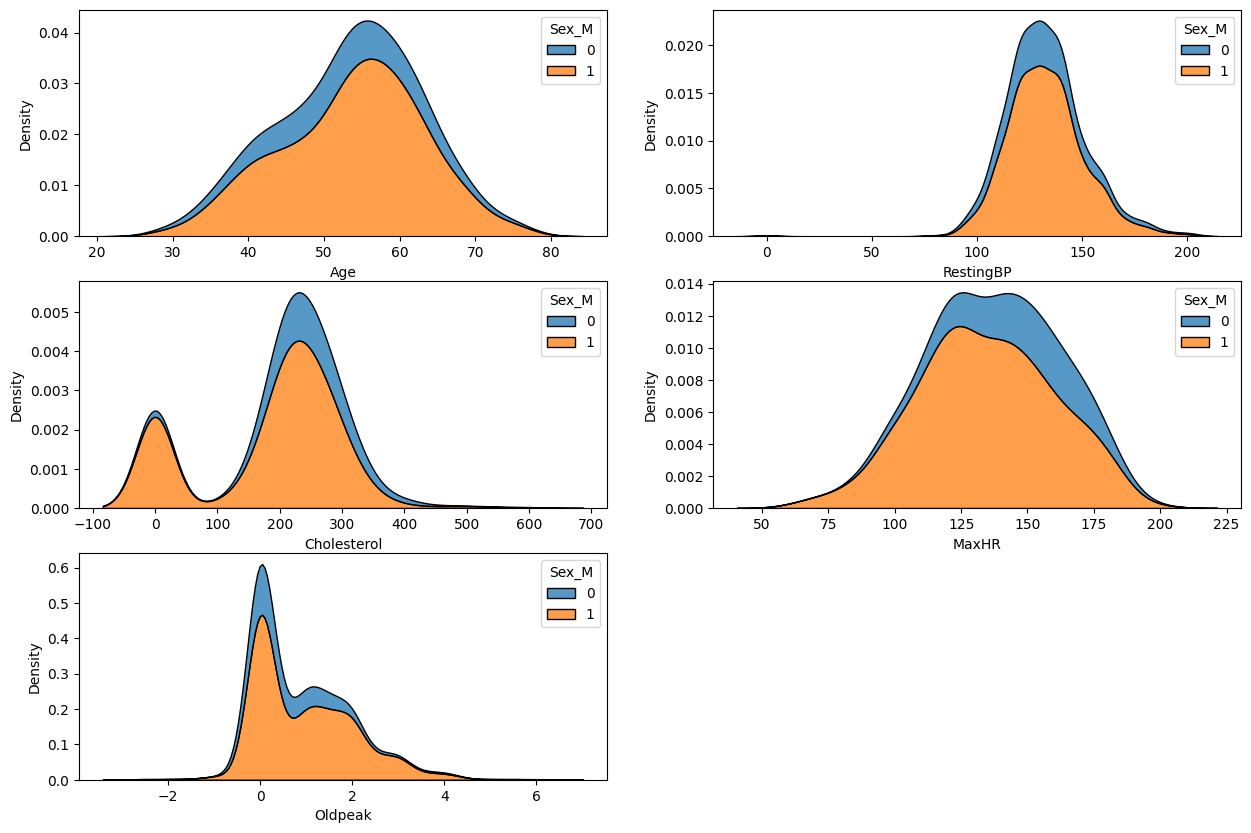

In [68]:
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="Sex_M", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="Sex_M", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="Sex_M", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="Sex_M", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="Sex_M", multiple="stack")

plt.show()

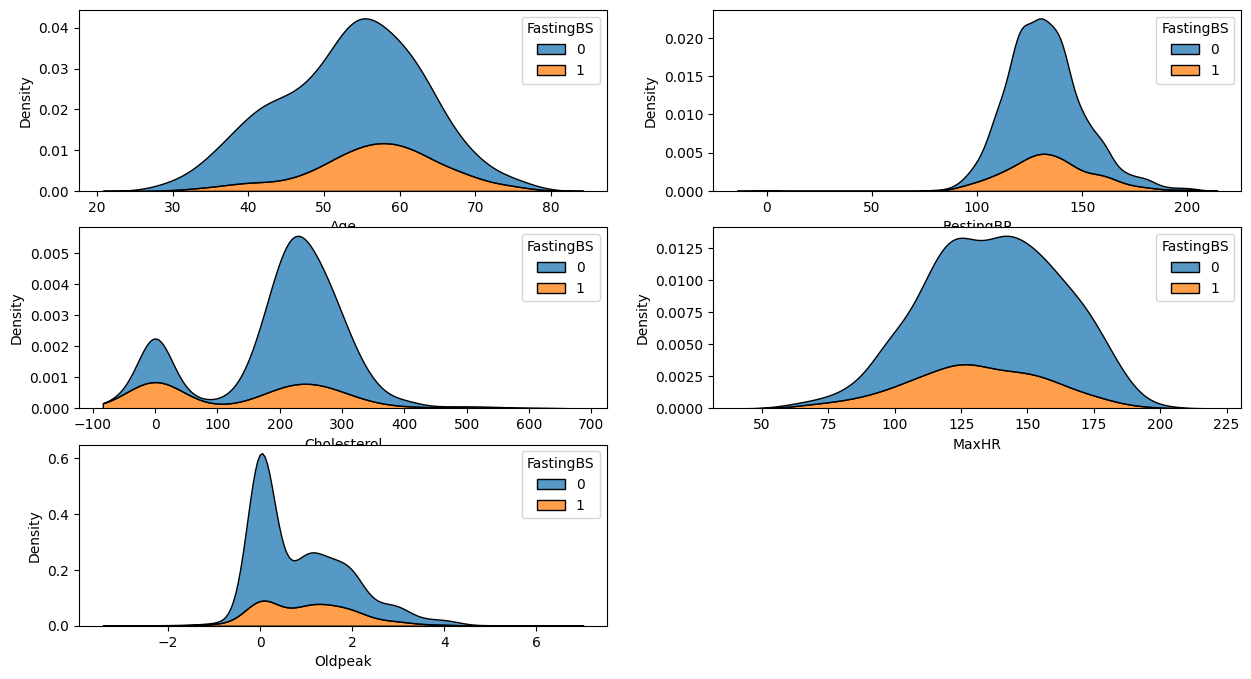

In [110]:
plt.figure(figsize=(15,8))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="FastingBS", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="FastingBS", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="FastingBS", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="FastingBS", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="FastingBS", multiple="stack")
plt.show()

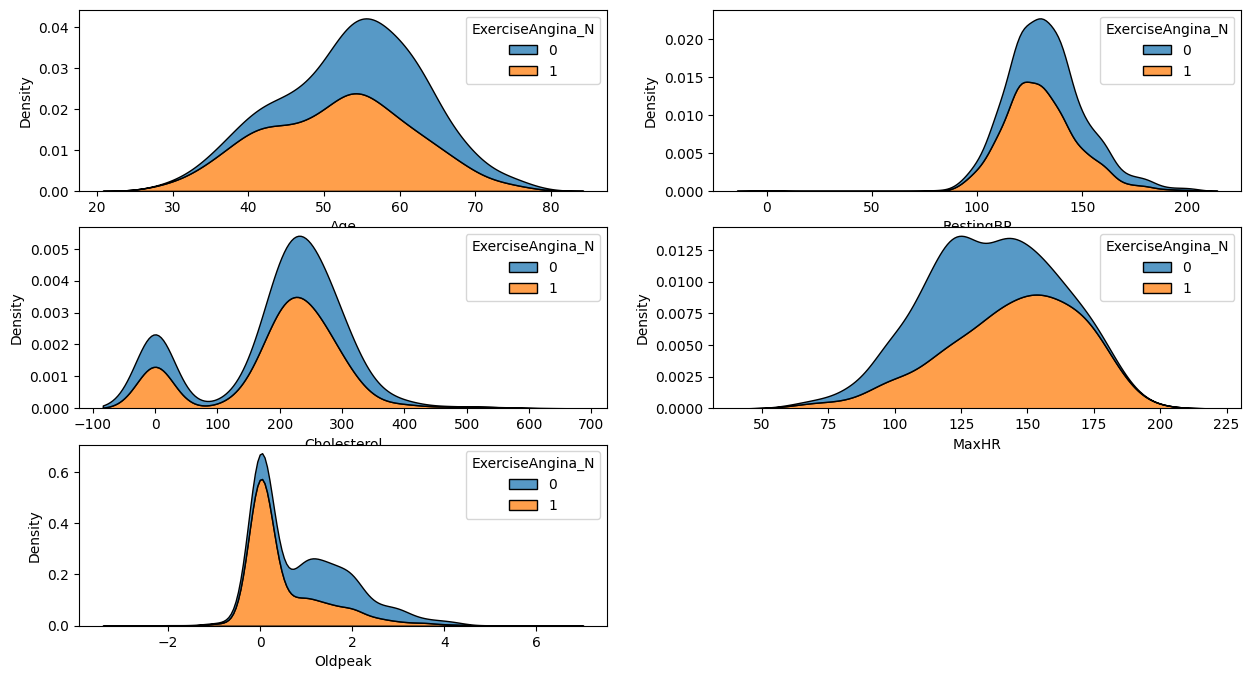

In [111]:
plt.figure(figsize=(15,8))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="ExerciseAngina_N", multiple="stack")
plt.show()

In [ ]:
#Vemos como se comportan las variables de valores multiples ( Age, RestingBP, Cholesterol, MaxHR, Oldpeak) con los valores
# de las variables categoricas ChestPainType, RestingECG, ST_Slope

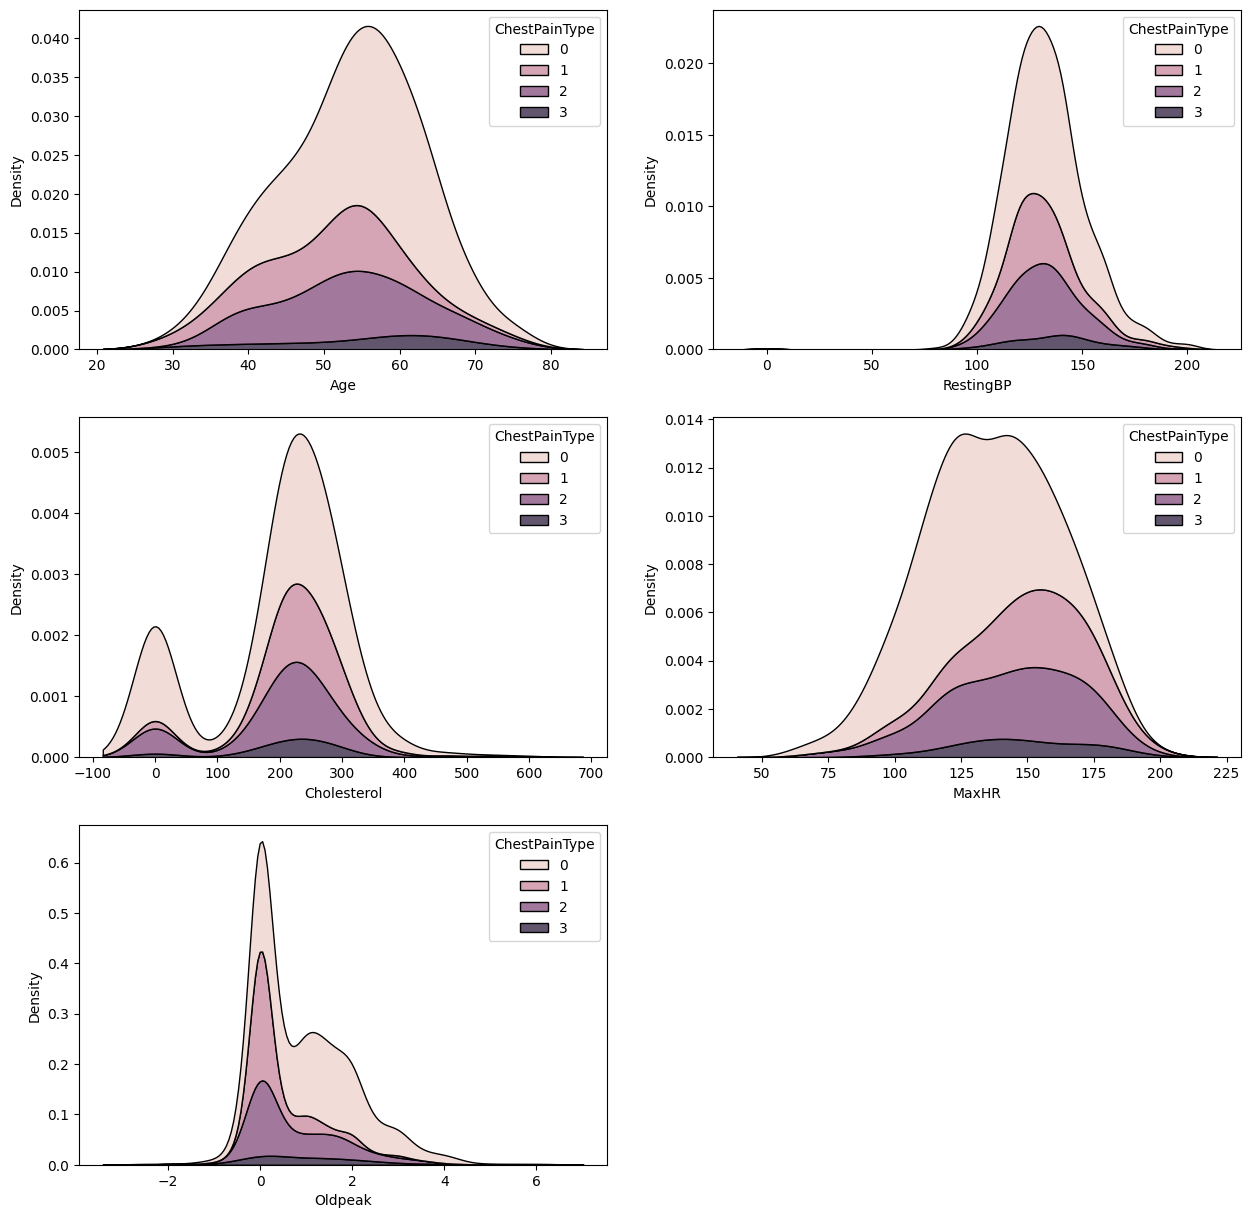

In [113]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="ChestPainType", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="ChestPainType", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="ChestPainType", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="ChestPainType", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="ChestPainType", multiple="stack")

plt.show()

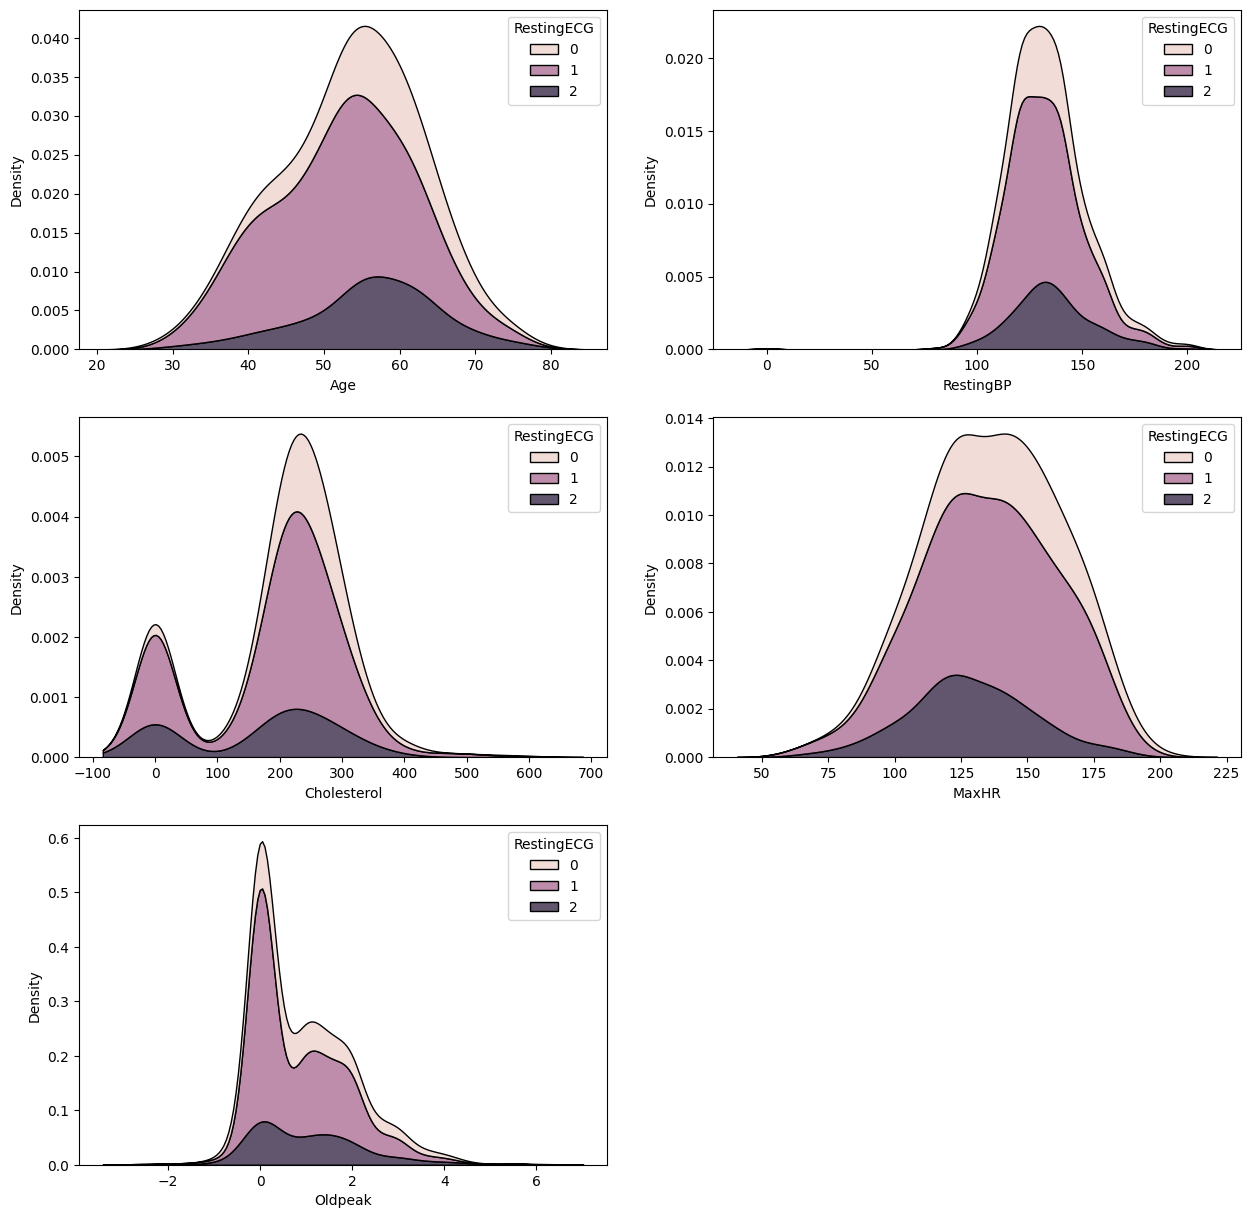

In [114]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="RestingECG", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="RestingECG", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="RestingECG", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="RestingECG", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="RestingECG", multiple="stack")

plt.show()

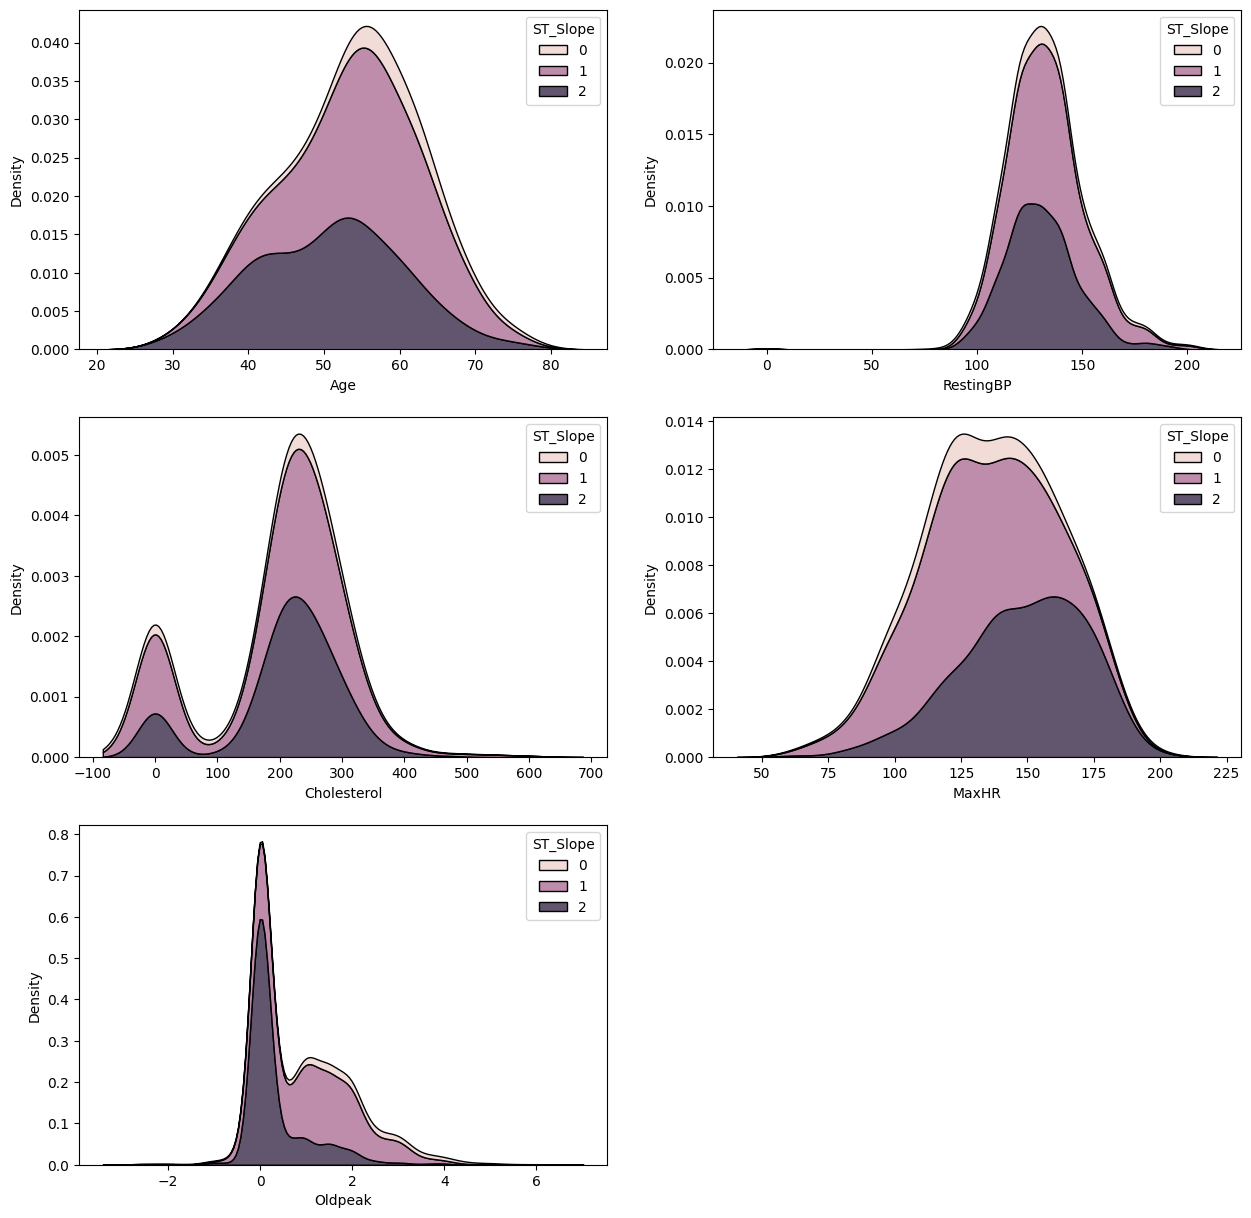

In [116]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.kdeplot(data=data, x="Age", hue="ST_Slope", multiple="stack")
plt.subplot(322)
sns.kdeplot(data=data, x="RestingBP", hue="ST_Slope", multiple="stack")
plt.subplot(323)
sns.kdeplot(data=data, x="Cholesterol", hue="ST_Slope", multiple="stack")
plt.subplot(324)
sns.kdeplot(data=data, x="MaxHR", hue="ST_Slope", multiple="stack")
plt.subplot(325)
sns.kdeplot(data=data, x="Oldpeak", hue="ST_Slope", multiple="stack")

plt.show()

In [ ]:
#Vemos como se comportan las variables categoricas ChestPainType, RestingECG, ST_Slope frente a las binarias
# HeartDisease,  Sex_M, FastingBS, ExerciseAngina_N

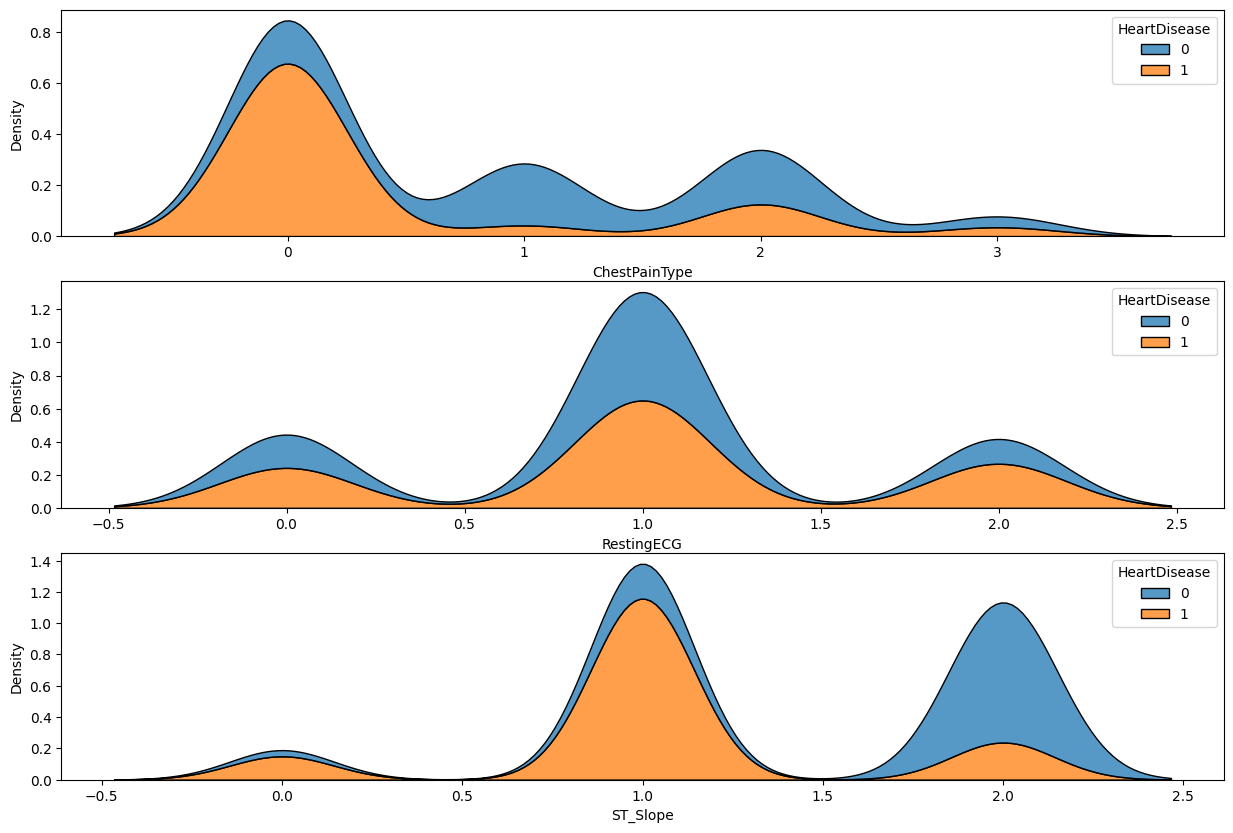

In [103]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="HeartDisease", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="HeartDisease", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="HeartDisease", multiple="stack")

plt.show()

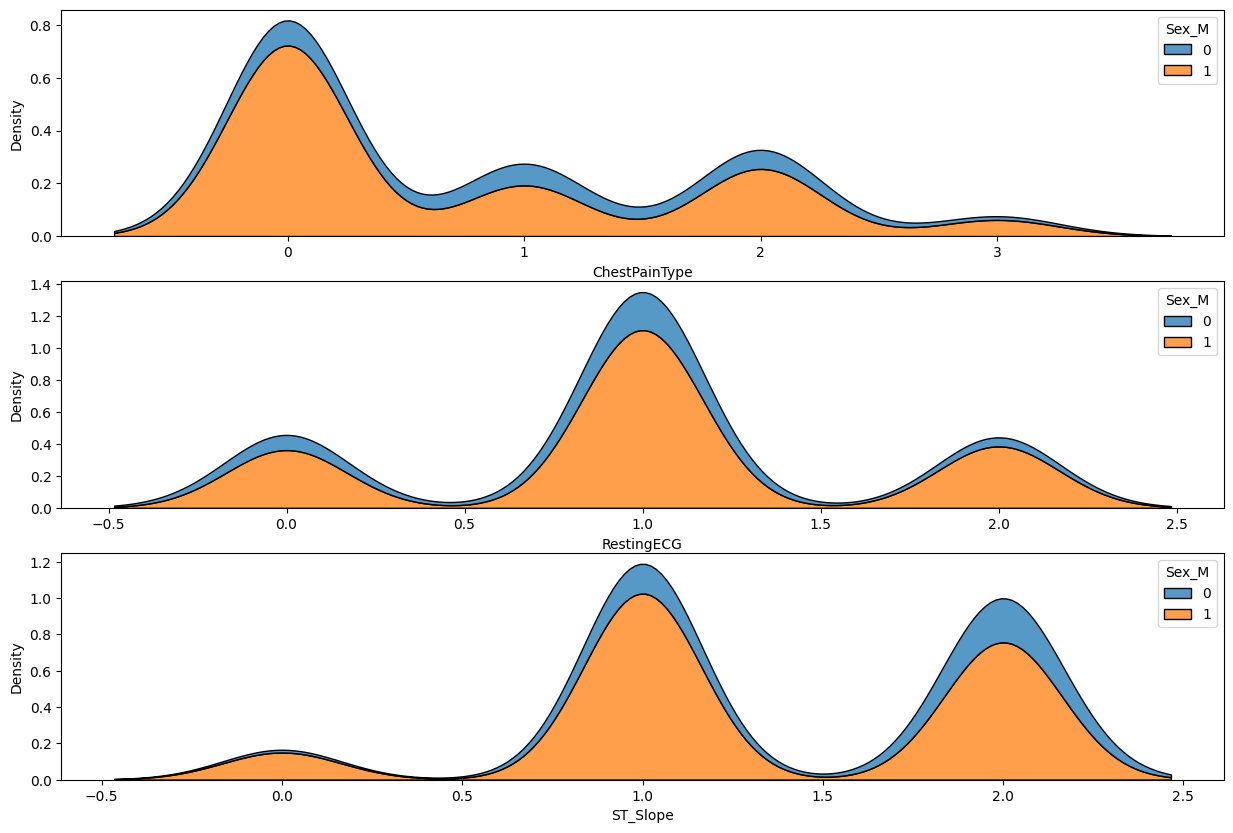

In [102]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="Sex_M", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="Sex_M", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="Sex_M", multiple="stack")

plt.show()

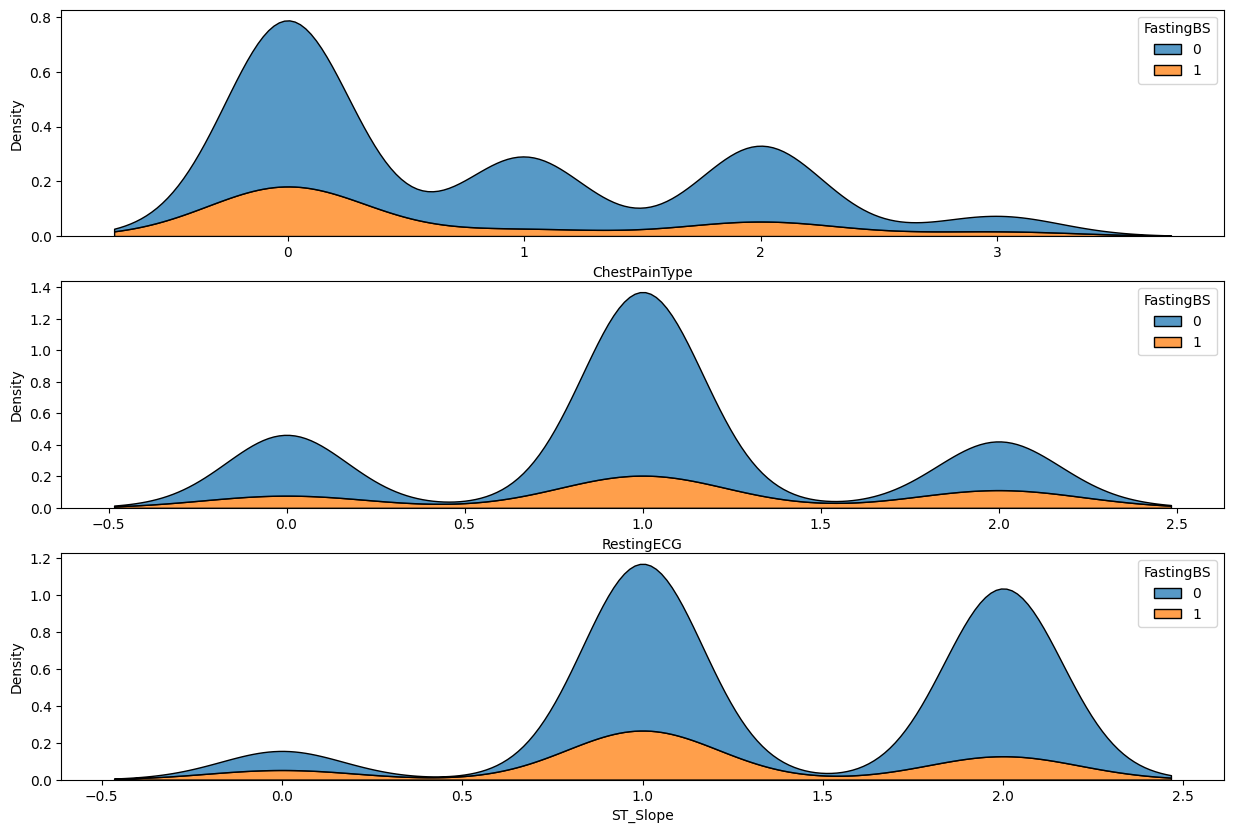

In [101]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="FastingBS", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="FastingBS", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="FastingBS", multiple="stack")

plt.show()

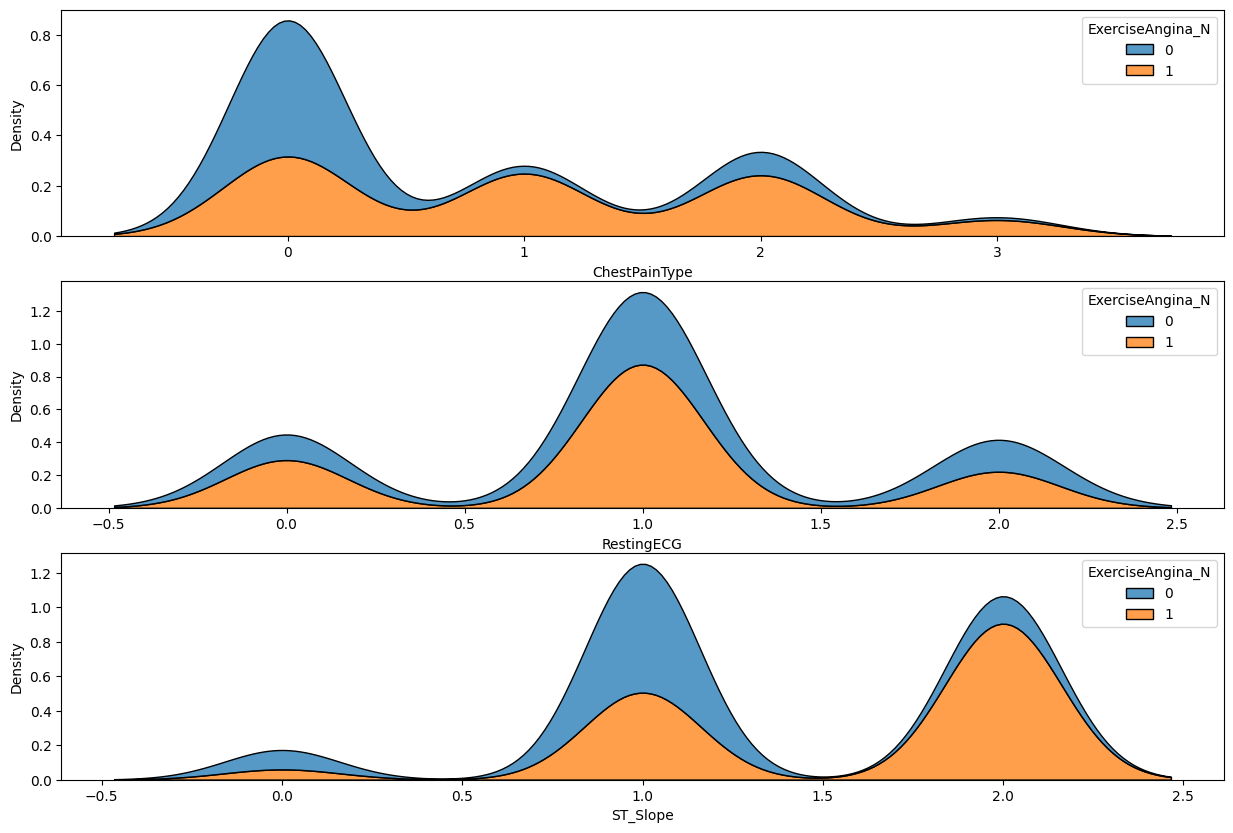

In [100]:
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.kdeplot(data=data, x="ChestPainType", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(312)
sns.kdeplot(data=data, x="RestingECG", hue="ExerciseAngina_N", multiple="stack")
plt.subplot(313)
sns.kdeplot(data=data, x="ST_Slope", hue="ExerciseAngina_N", multiple="stack")

plt.show()

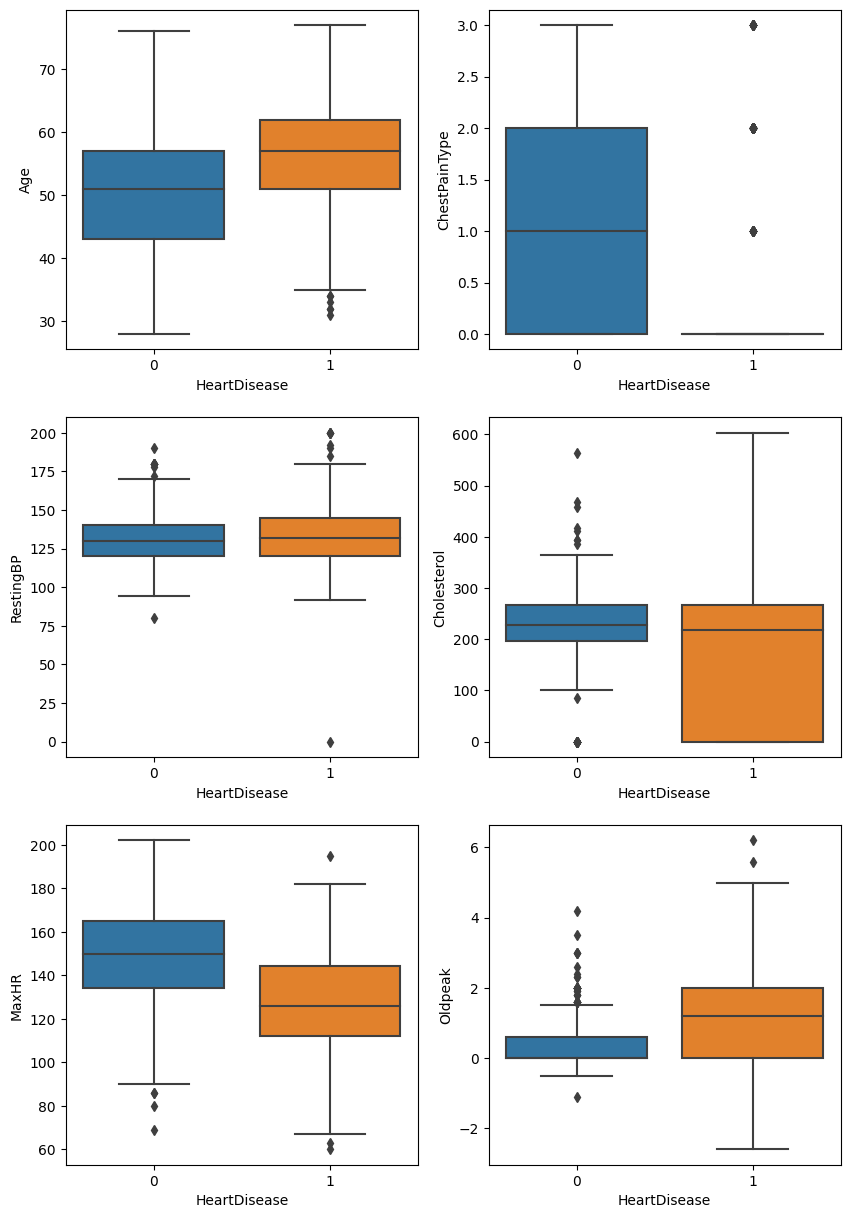

In [237]:
def graph(y):
    sns.boxplot(x="HeartDisease", y=y, data=data)

plt.figure(figsize=(10,15))
# Adding the subplot at the specified
# grid position
plt.subplot(321)
graph('Age')
plt.subplot(322)
graph('ChestPainType')
plt.subplot(323)
graph('RestingBP')
plt.subplot(324)
graph('Cholesterol')
plt.subplot(325)
graph('MaxHR')
plt.subplot(326)
graph('Oldpeak')
plt.show()

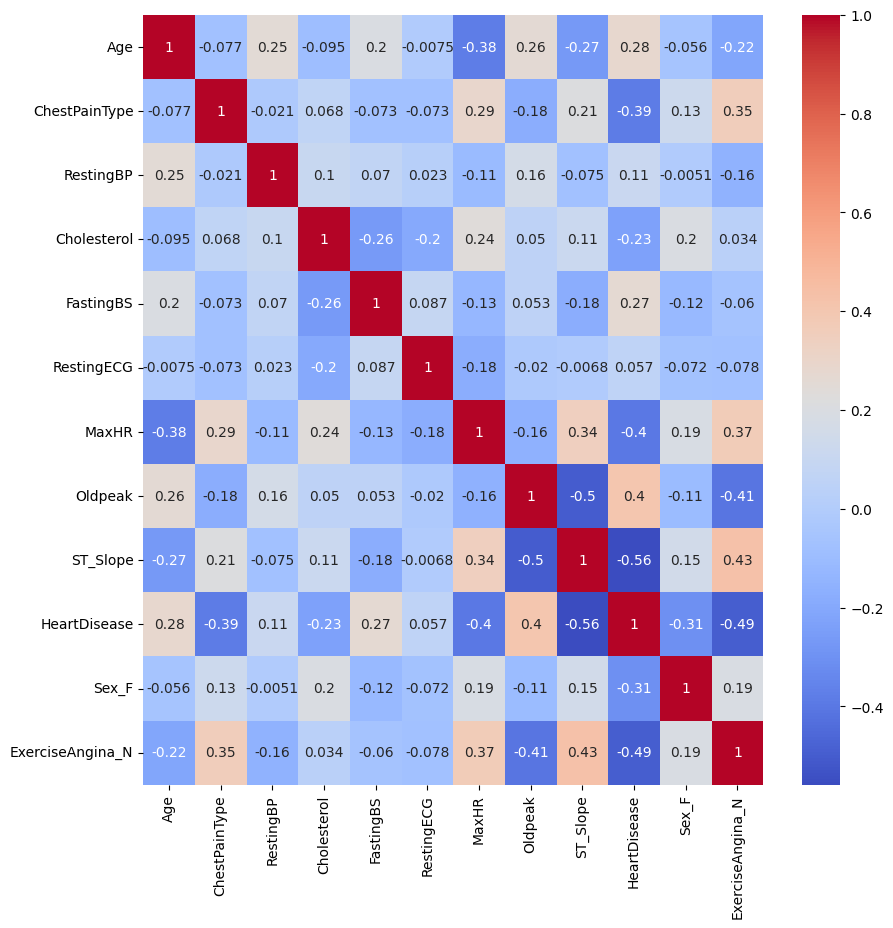

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),annot = True, cmap = "coolwarm")
plt.show()

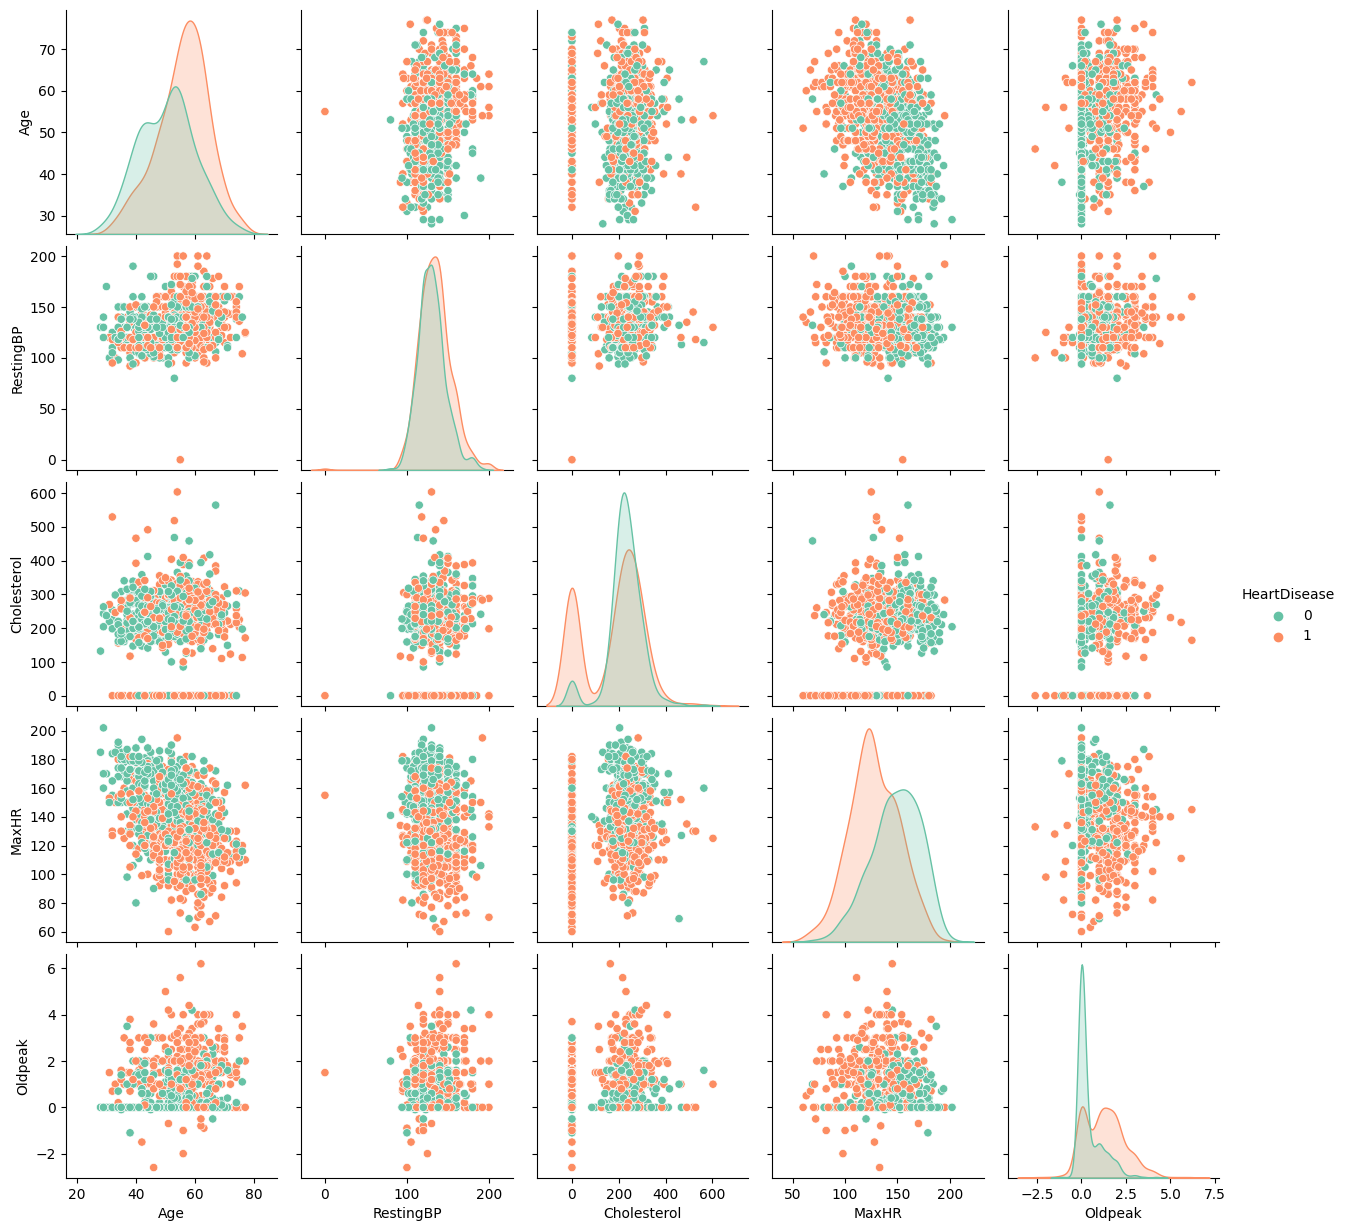

In [117]:
# Visualize the whole dataset de los valores de las variables multiples: Age, RestingBP, Cholesterol, MaxHR
data_multiple = data[['Age', 'RestingBP', 'Cholesterol', "MaxHR", "Oldpeak","HeartDisease"]].copy()
g = sns.pairplot(data_multiple, hue='HeartDisease', palette="Set2", diag_kind="kde", height=2.5)
plt.show()

In [118]:
columns

['Age',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ExerciseAngina_N',
 'ExerciseAngina_Y']

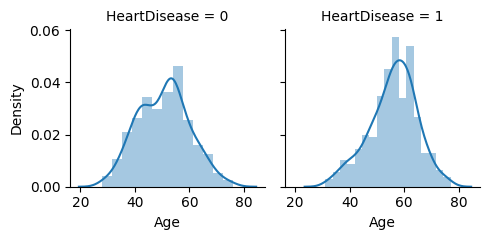

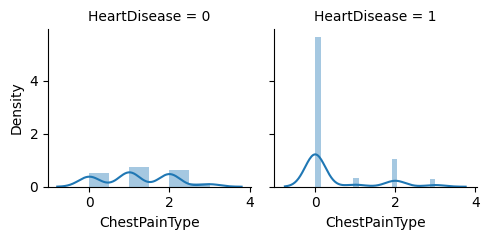

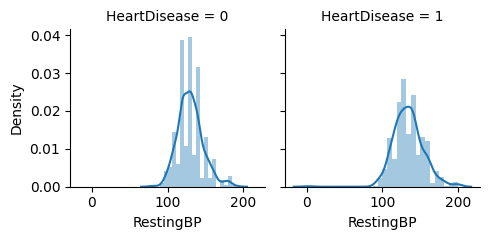

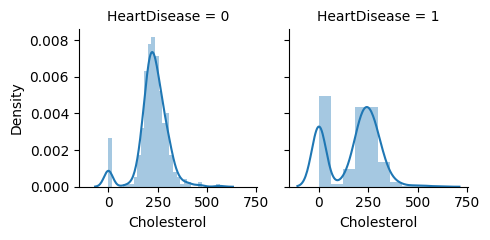

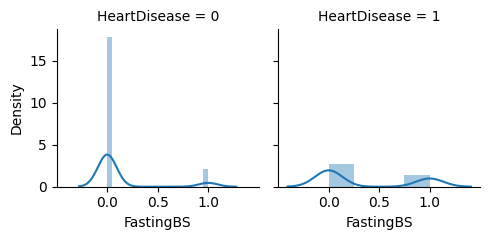

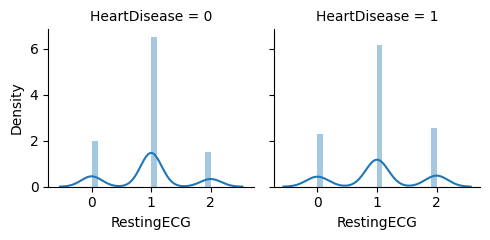

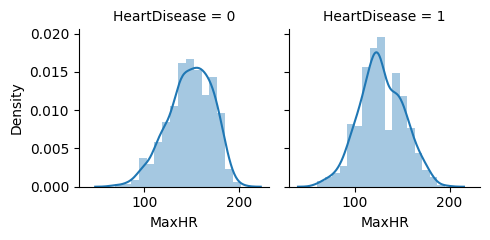

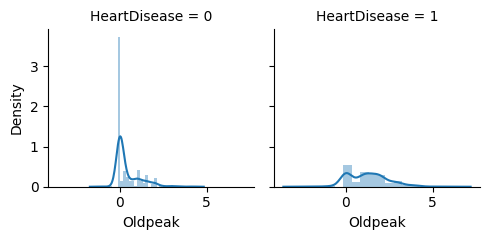

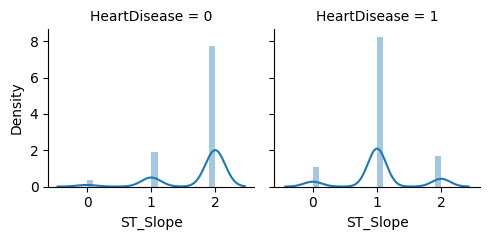

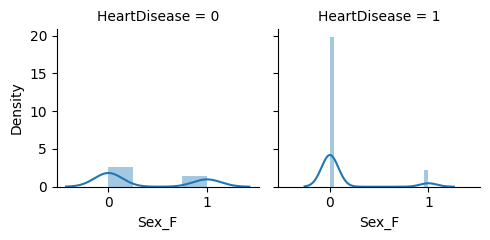

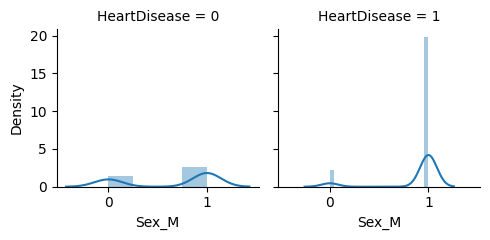

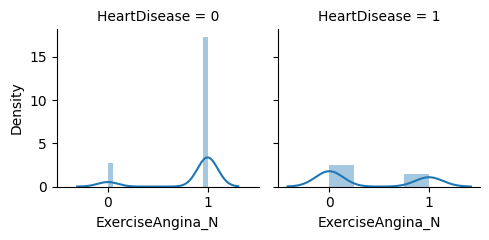

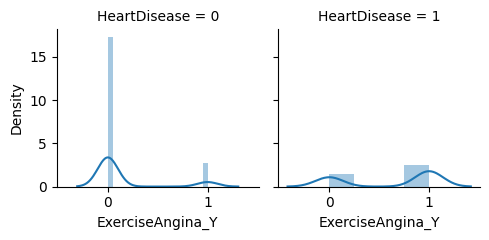

In [119]:
for columna in columns:
    if columna != "HeartDisease":
        plot = sns.FacetGrid(data, col="HeartDisease", palette="Set2", height=2.5) 
        plot.map(sns.distplot, columna)
        plt.show()

In [267]:
from pycaret.classification import *
clf = setup(data=data, target="HeartDisease")
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5341, verbose=0,
                       warm_start=False)

In [ ]:
# Optamos por los modelo basados en arboles

In [184]:
data.drop(columns=["Sex_M"], inplace=True)
data.drop(columns=["ExerciseAngina_Y"],inplace=True)
data

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40              1        140          289          0           1    172   
1     49              2        160          180          0           1    156   
2     37              1        130          283          0           2     98   
3     48              0        138          214          0           1    108   
4     54              2        150          195          0           1    122   
..   ...            ...        ...          ...        ...         ...    ...   
913   45              3        110          264          0           1    132   
914   68              0        144          193          1           1    141   
915   57              0        130          131          0           1    115   
916   57              1        130          236          0           0    174   
917   38              2        138          175          0           1    173   

     Oldpeak  ST_Slope  HeartDisease  Sex_F  ExerciseAngina_N  
0        0.0         2             0      0                 1  
1        1.0         1             1      1                 1  
2        0.0         2             0      0                 1  
3        1.5         1             1      1                 0  
4        0.0         2             0      0                 1  
..       ...       ...           ...    ...               ...  
913      1.2         1             1      0                 1  
914      3.4         1             1      0                 1  
915      1.2         1             1      0                 0  
916      0.0         1             1      1                 1  
917      0.0         2             0      0                 1  

[918 rows x 12 columns]